In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10}) # pour augmenter la taille de caractère dans les graphiques
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score 

# k Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes algorithm Classifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import svm

Jaccard Scores :
brush_back : 100.0 %
brush_forward : 81.81818181818183 %
dig : 83.33333333333334 %
heel : 91.66666666666666 %
step : 88.88888888888889 %




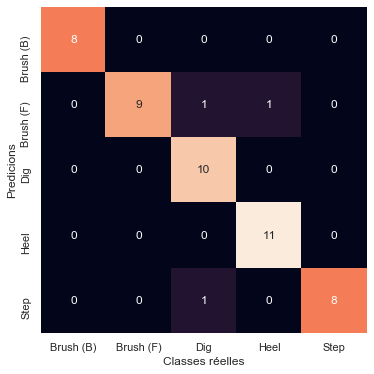

In [2]:
# kNN
# tutorial -> https://www.youtube.com/watch?v=4HKqjENq9OU

dataset = pd.read_csv('etapdance2/step_features_table_filt_truecorr_full_final.txt')
# split dataset
labels = ['brush_back','brush_forward','dig','heel','step']

X = dataset[[ 'Gyro0Y mean', 'Gyro0Z mean',
             'Accel0X mean','Accel0Z mean',
             'Gyro1X mean', 'Gyro1Y mean','Gyro1Z mean',
             'Accel1X mean','Accel1Z mean',

              'Gyro0X std', 'Gyro0Y std','Gyro0Z std',
             'Accel0X std', 'Accel0Z std',
             'Gyro1X std', 'Gyro1Y std', 
             'Accel1X std', 'Accel1Y std', 'Accel1Z std',

             'Gyro0X ent', 'Gyro0Y ent', 'Gyro0Z ent', 
             'Accel0X ent', 'Accel0Y ent', 
             'Gyro1X ent', 'Gyro1Y ent','Gyro1Z ent',
             'Accel1X ent','Accel1Y ent','Accel1Z ent',
            
             'Gyro0X corr', 'Gyro0Z corr', 
             'Accel0X corr', 'Accel0Y corr',
             
             'Accel1X corr']]
y = dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, test_size=0.2)

classifierkNN = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

#fit Model
classifierkNN.fit(X_train,y_train)

y_pred = classifierkNN.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

labels_court = ['Brush (B)','Brush (F)','Dig','Heel','Step']

plt.figure(figsize = (6,6))
ax = sns.heatmap(cm.T, square=True, annot=True
                ,fmt='d', cbar=False
                , xticklabels=labels_court
                , yticklabels=labels_court)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Classes réelles')
plt.ylabel('Predictions');
#plt.savefig(fname='cm_test7_kNN_k3.png')


j_score = jaccard_score(y_test,y_pred,labels,average=None)
F1_score = f1_score(y_test,y_pred,labels,average=None)

print('Jaccard Scores :')
for n in range(len(labels)):
    print(labels[n],':',j_score[n]*100,'%')
print('\n')
    
#print('F1 Scores :')
#for n in range(len(labels)):
#    print(labels[n],':',F1_score[n]*100,'%')
#print('\n')
    
#for n in range(len(y_pred)):
#    print('test',n,':',y_test.array[n],'->',y_pred[n])

Jaccard Scores :
brush_back : 100.0 %
brush_forward : 92.3076923076923 %
dig : 100.0 %
heel : 100.0 %
step : 75.0 %




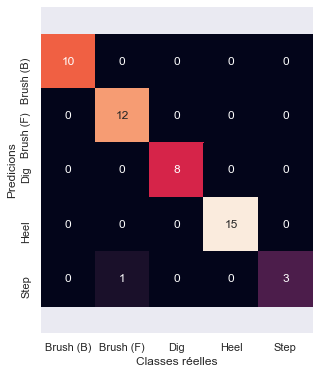

In [4]:
dataset = pd.read_csv('etapdance2/step_features_table_filt_truecorr_full_final.txt')
# split dataset
labels = ['brush_back','brush_forward','dig','heel','step']

X = dataset[['Gyro0X mean', 'Gyro0Y mean', 'Gyro0Z mean',
             'Accel0X mean','Accel0Y mean','Accel0Z mean',
             'Gyro1X mean', 'Gyro1Y mean','Gyro1Z mean',
             'Accel1X mean', 'Accel1Y mean','Accel1Z mean',

              'Gyro0X std', 'Gyro0Y std','Gyro0Z std',
             'Accel0X std', 'Accel0Y std', 'Accel0Z std',
             'Gyro1X std', 'Gyro1Y std', 'Gyro1Z std', 
             'Accel1X std', 'Accel1Y std', 'Accel1Z std',

             'Gyro0X ent', 'Gyro0Y ent', 'Gyro0Z ent', 
             'Accel0X ent', 'Accel0Y ent', 'Accel0Z ent', 
             'Gyro1X ent', 'Gyro1Y ent','Gyro1Z ent',
             'Accel1X ent','Accel1Y ent','Accel1Z ent',
            
             'Gyro0X corr', 'Gyro0Y corr', 'Gyro0Z corr', 
             'Accel0X corr', 'Accel0Y corr', 'Accel0Z corr', 
             'Gyro1X corr', 'Gyro1Y corr','Gyro1Z corr',
             'Accel1X corr','Accel1Y corr','Accel1Z corr']]
y = dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.2)

ClassifierNB = GaussianNB()

ClassifierNB.fit(X_train,y_train)

y_pred = ClassifierNB.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

labels_court = ['Brush (B)','Brush (F)','Dig','Heel','Step']

plt.figure(figsize = (6,6))
ax = sns.heatmap(cm.T, square=True, annot=True
                ,fmt='d', cbar=False
                , xticklabels=labels_court
                , yticklabels=labels_court)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Classes réelles')
plt.ylabel('Predicions');
#plt.savefig(fname='cm_test6_NBA.png')

j_score = jaccard_score(y_test,y_pred,average=None)
F1_score = f1_score(y_test,y_pred,labels,average=None)

print('Jaccard Scores :')
for n in range(len(labels)):
    print(labels[n],':',j_score[n]*100,'%')
print('\n')
    
#print('F1 Scores :')
#for n in range(len(labels)):
#    print(labels[n],':',F1_score[n]*100,'%')
#print('\n')
    
#for n in range(len(y_pred)):
#    print('test',n,':',y_test.array[n],'->',y_pred[n])

Jaccard Scores :
brush_back : 100.0 %
brush_forward : 88.88888888888889 %
dig : 76.92307692307693 %
heel : 100.0 %
step : 63.63636363636363 %


test 0 : dig -> dig
test 1 : dig -> dig
test 2 : brush_back -> brush_back
test 3 : brush_forward -> brush_forward
test 4 : dig -> dig
test 5 : brush_forward -> brush_forward
test 6 : dig -> step
test 7 : brush_forward -> brush_forward
test 8 : heel -> heel
test 9 : step -> step
test 10 : step -> step
test 11 : heel -> heel
test 12 : heel -> heel
test 13 : heel -> heel
test 14 : heel -> heel
test 15 : dig -> step
test 16 : heel -> heel
test 17 : dig -> dig
test 18 : step -> step
test 19 : brush_back -> brush_back
test 20 : heel -> heel
test 21 : dig -> dig
test 22 : brush_forward -> brush_forward
test 23 : dig -> dig
test 24 : brush_back -> brush_back
test 25 : brush_back -> brush_back
test 26 : step -> step
test 27 : heel -> heel
test 28 : brush_back -> brush_back
test 29 : step -> step
test 30 : brush_forward -> step
test 31 : brush_back -> br

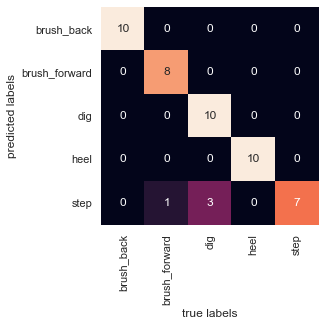

In [36]:
# ARbre de décision
dataset = pd.read_csv('etapdance2/step_features_table_filt_truecorr_full_final.txt')
# split dataset
labels = ['brush_back','brush_forward','dig','heel','step']

X = dataset[['Gyro0X mean', 'Gyro0Y mean', 'Gyro0Z mean',
             'Accel0X mean','Accel0Y mean','Accel0Z mean',
             'Gyro1X mean', 'Gyro1Y mean','Gyro1Z mean',
             'Accel1X mean', 'Accel1Y mean','Accel1Z mean',

              'Gyro0X std', 'Gyro0Y std','Gyro0Z std',
             'Accel0X std', 'Accel0Y std', 'Accel0Z std',
             'Gyro1X std', 'Gyro1Y std', 'Gyro1Z std', 
             'Accel1X std', 'Accel1Y std', 'Accel1Z std',

             'Gyro0X ent', 'Gyro0Y ent', 'Gyro0Z ent', 
             'Accel0X ent', 'Accel0Y ent', 'Accel0Z ent', 
             'Gyro1X ent', 'Gyro1Y ent','Gyro1Z ent',
             'Accel1X ent','Accel1Y ent','Accel1Z ent',
            
             'Gyro0X corr', 'Gyro0Y corr', 'Gyro0Z corr', 
             'Accel0X corr', 'Accel0Y corr', 'Accel0Z corr', 
             'Gyro1X corr', 'Gyro1Y corr','Gyro1Z corr',
             'Accel1X corr','Accel1Y corr','Accel1Z corr']]
y = dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

ClassifierDT = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth=7, min_samples_leaf=5)

ClassifierDT.fit(X_train,y_train)

y_pred = ClassifierDT.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False
               , xticklabels=labels
               , yticklabels=labels)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true labels')
plt.ylabel('predicted labels');

j_score = jaccard_score(y_test,y_pred,labels,average=None)
#F1_score = f1_score(y_test,y_pred,labels,average=None)

print('Jaccard Scores :')
for n in range(len(labels)):
    print(labels[n],':',j_score[n]*100,'%')
print('\n')
    
#print('F1 Scores :')
#for n in range(len(labels)):
#    print(labels[n],':',F1_score[n]*100,'%')
#print('\n')
    
#for n in range(len(y_pred)):
#    print('test',n,':',y_test.array[n],'->',y_pred[n])

Jaccard Scores :
brush_back : 100.0 %
brush_forward : 100.0 %
dig : 72.72727272727273 %
heel : 73.33333333333333 %
step : 75.0 %




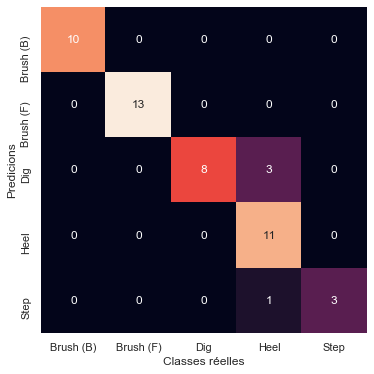

In [33]:
#support vector machine avec noyau RBF
dataset = pd.read_csv('etapdance2/step_features_table_filt_truecorr_full_final.txt')
# split dataset
labels = ['brush_back','brush_forward','dig','heel','step']

X = dataset[['Gyro0X mean', 'Gyro0Y mean', 'Gyro0Z mean',
             'Accel0X mean','Accel0Y mean','Accel0Z mean',
             'Gyro1X mean', 'Gyro1Y mean','Gyro1Z mean',
             'Accel1X mean', 'Accel1Y mean','Accel1Z mean',

              'Gyro0X std', 'Gyro0Y std','Gyro0Z std',
             'Accel0X std', 'Accel0Y std', 'Accel0Z std',
             'Gyro1X std', 'Gyro1Y std', 'Gyro1Z std', 
             'Accel1X std', 'Accel1Y std', 'Accel1Z std',

             'Gyro0X ent', 'Gyro0Y ent', 'Gyro0Z ent', 
             'Accel0X ent', 'Accel0Y ent', 'Accel0Z ent', 
             'Gyro1X ent', 'Gyro1Y ent','Gyro1Z ent',
             'Accel1X ent','Accel1Y ent','Accel1Z ent',
            
             'Gyro0X corr', 'Gyro0Y corr', 'Gyro0Z corr', 
             'Accel0X corr', 'Accel0Y corr', 'Accel0Z corr', 
             'Gyro1X corr', 'Gyro1Y corr','Gyro1Z corr',
             'Accel1X corr','Accel1Y corr','Accel1Z corr']]
y = dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.2)

ClassifierSVM = svm.SVC(kernel='rbf',gamma='auto')

ClassifierSVM.fit(X_train,y_train)

y_pred = ClassifierSVM.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

labels_court = ['Brush (B)','Brush (F)','Dig','Heel','Step']

plt.figure(figsize = (6,6))
ax = sns.heatmap(cm.T, square=True, annot=True
                ,fmt='d', cbar=False
                , xticklabels=labels_court
                , yticklabels=labels_court)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Classes réelles')
plt.ylabel('Predicions');
#plt.savefig(fname='cm_test6_SVM.png')

j_score = jaccard_score(y_test,y_pred,labels,average=None)
#F1_score = f1_score(y_test,y_pred,labels,average=None)

print('Jaccard Scores :')
for n in range(len(labels)):
    print(labels[n],':',j_score[n]*100,'%')
print('\n')
    
#print('F1 Scores :')
#for n in range(len(labels)):
#    print(labels[n],':',F1_score[n]*100,'%')
#print('\n')
    
#for n in range(len(y_pred)):
#    print('test',n,':',y_test.array[n],'->',y_pred[n])